Setup

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

df = pd.read_csv("./output/BruteForce/data2.csv")
print(df.shape)

(215155, 81)


Column filtering

In [55]:
df = df.get(["cpu_total", "class", "flow_duration", "flow_byts_s", "flow_pkts_s", "tot_fwd_pkts", "tot_bwd_pkts", "totlen_fwd_pkts", "totlen_bwd_pkts"])
print(df.shape)
df.head()

(215155, 9)


,cpu,class,flow_duration,flow_byts_s,flow_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts
0,0.028495,0,1.840852e+07,940.434104,8.691628,86,74,11908,5404
1,0.028495,0,1.047939e+08,69.641439,0.295819,16,15,6113,1185
2,0.028495,0,9.622328e+07,692.670201,0.821007,51,28,29785,36866
3,0.028495,0,9.622329e+07,249.762812,0.550802,34,19,14467,9566
4,0.028495,0,1.030796e+08,376.398500,0.562672,36,22,18245,20554


(215155, 8)
Index(['class', 'flow_duration', 'flow_byts_s', 'flow_pkts_s', 'tot_fwd_pkts',
       'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts'],
      dtype='object')
(8, 8)


<Axes: >

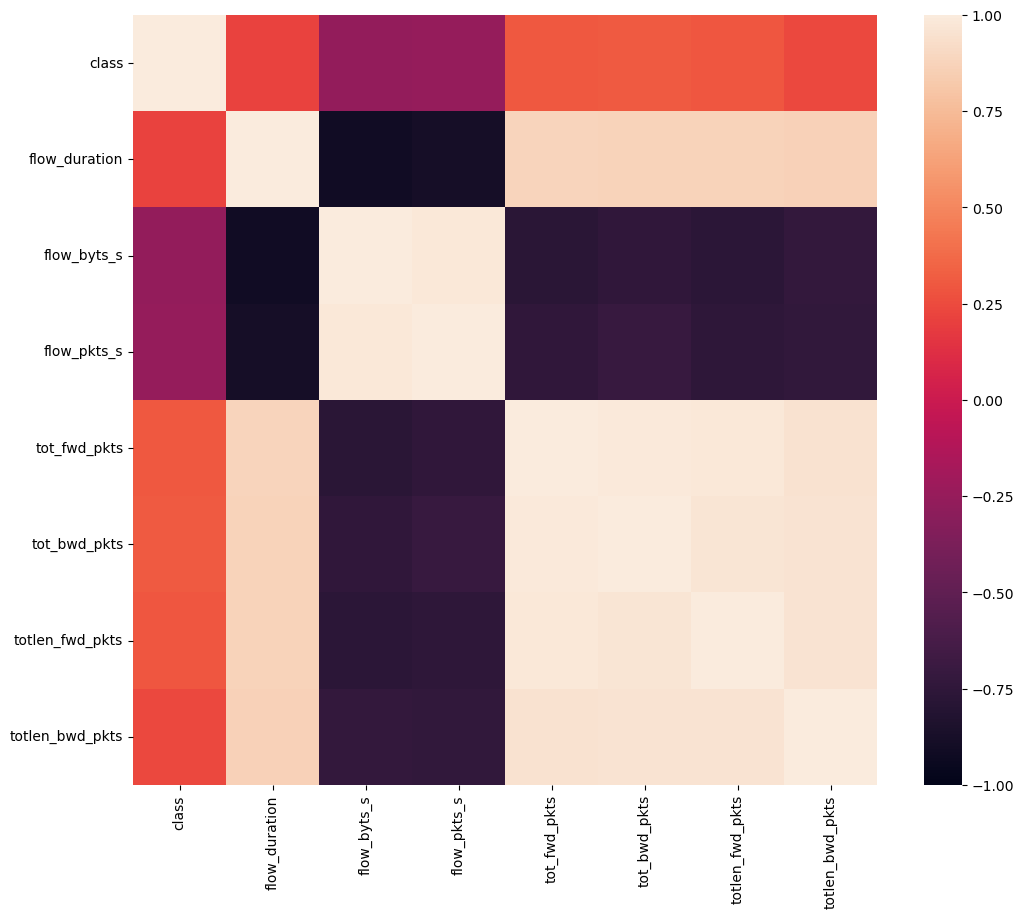

In [56]:
plt.figure(figsize=(12, 10))
corr_df= df
corr_df= corr_df.drop([ 'cpu_total'], axis=1)
r = corr_df.corr(method='spearman')
print(corr_df.shape)
print(corr_df.columns)
print(r.shape)
sns.heatmap(r, vmin=-1, vmax=1)

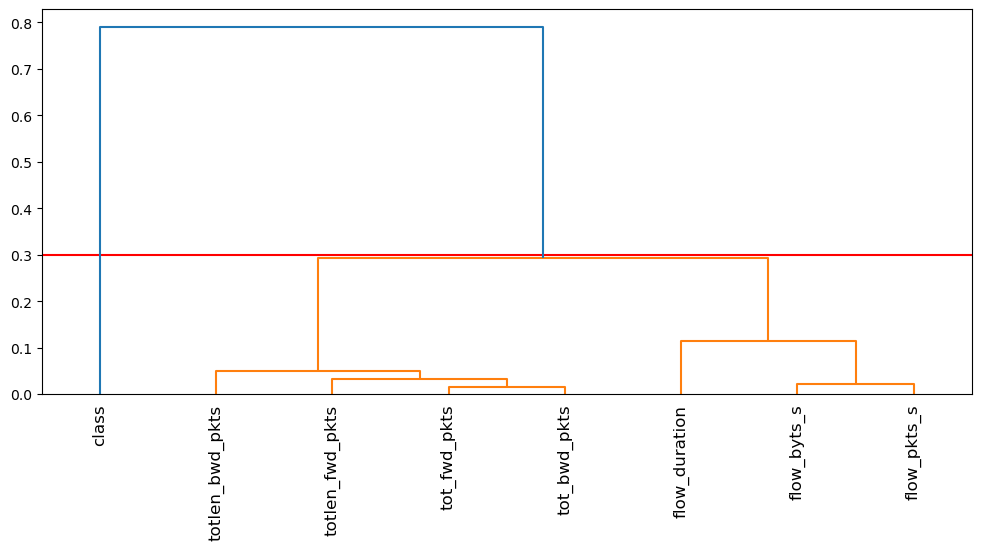

In [57]:
plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(r)

Z = linkage(squareform(dissimilarity), 'complete')
plt.axhline(y=.3, c="red")
dendrogram(Z, labels=corr_df.columns, orientation='top',
           leaf_rotation=90)
plt.show()

In [58]:
df_corr= corr_df
df_corr= df_corr.drop(["flow_byts_s", "tot_bwd_pkts", "totlen_fwd_pkts", "totlen_bwd_pkts"], axis=1)
# df_corr= df_corr.drop(['flow_iat_mean', 'flow_iat_std', 'flow_iat_mean', 'fwd_pkts_b_avg', 'fwd_byts_b_avg', 'subflow_bwd_pkts', 'tot_bwd_pkts', 'fwd_pkts_s', 'bwd_byts_b_avg', 'bwd_blk_rate_avg', 'bwd_pkts_s', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_header_len', 'flow_pkts_s', 'fwd_pkt_len_mean', 'fwd_seg_size_avg', 'fwd_pkt_len_std', 'pkt_len_max', 'pkt_len_mean', 'pkt_size_avg', 'pkt_len_std', 'pkt_len_var', 'flow_byts_s', 'totlen_bwd_pkts', 'flow_iat_max', 'idle_max', 'fwd_pkt_len_min', 'nb_flows', 'active_mean', 'active_max', 'active_std', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_pkt_len_std', 'bwd_seg_size_avg', 'bwd_pkt_len_mean', 'bwd_pkt_len_max', 'fwd_seg_size_min', 'down_up_ratio', 'bwd_iat_tot', 'init_bwd_win_byts', 'bwd_iat_mean', 'bwd_iat_max', 'fwd_iat_min', 'nb_ports', 'init_fwd_win_byts', 'bwd_iat_min', 'tot_fwd_pkts', 'subflow_bwd_byts', 'totlen_fwd_pkts', 'subflow_fwd_pkts', 'subflow_fwd_byts'], axis=1)

<Axes: >

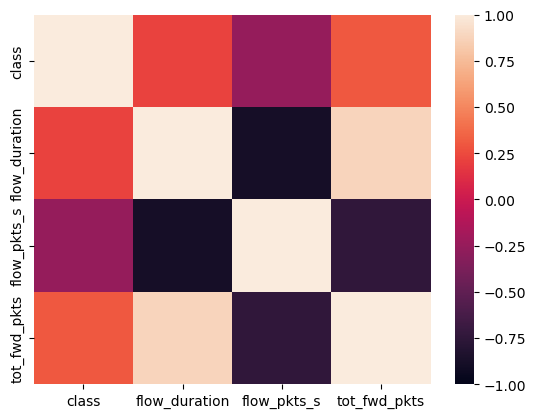

In [59]:
r1 = df_corr.corr(method='spearman')
sns.heatmap(r1, vmin=-1, vmax=1)

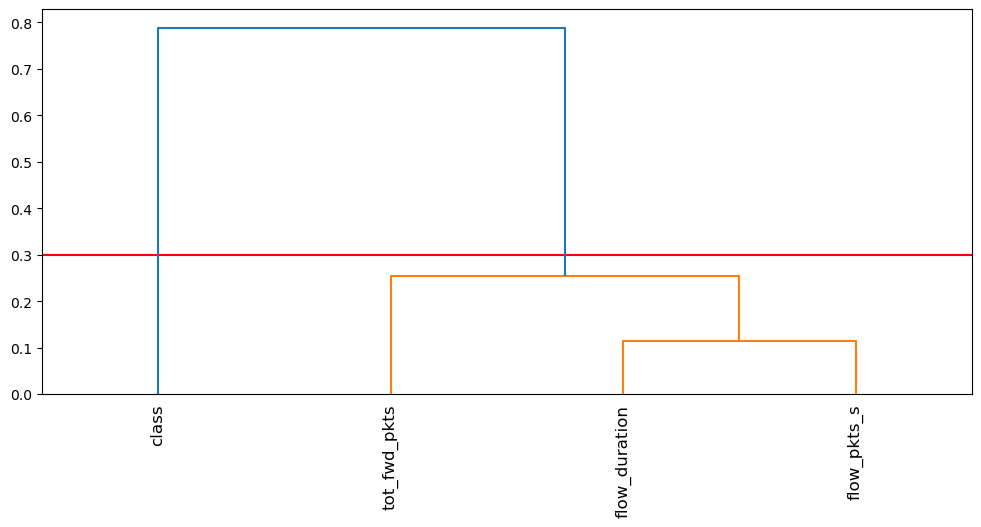

In [60]:
r1 = df_corr.corr(method='spearman')
plt.figure(figsize=(12, 5))
dissimilarity = 1 - abs(r1)
Z = linkage(squareform(dissimilarity), 'complete')
plt.axhline(y=.3, c="red")
dendrogram(Z, labels=df_corr.columns, orientation='top',
           leaf_rotation=90);

In [61]:
import numpy as np
def discretize_by_median(data, column, median_value, margin=0.0):
    # Define the margin around the median
    lower_bound = median_value - margin
    upper_bound = median_value + margin

    # Filter out points around the median
    filtered_data = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Discretize the filtered data
    filtered_data[column + '_discretized'] = pd.cut(filtered_data[column],
                                                    bins=[filtered_data[column].min(), median_value, filtered_data[column].max()],
                                                    labels=[0, 1])
    return filtered_data

print(np.median(df['cpu_total']))
df= discretize_by_median(df, 'cpu_total', np.median(df['cpu_total']) )
df[df['cpu_total_discretized']==0]

0.98668


C:\Users\hr_mo\AppData\Local\Temp\ipykernel_16704\2648645974.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column + '_discretized'] = pd.cut(filtered_data[column],


,cpu,class,flow_duration,flow_byts_s,flow_pkts_s,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,cpu_discretized
0,0.028495,0,1.840852e+07,940.434104,8.691628,86,74,11908,5404,0
1,0.028495,0,1.047939e+08,69.641439,0.295819,16,15,6113,1185,0
2,0.028495,0,9.622328e+07,692.670201,0.821007,51,28,29785,36866,0
3,0.028495,0,9.622329e+07,249.762812,0.550802,34,19,14467,9566,0
4,0.028495,0,1.030796e+08,376.398500,0.562672,36,22,18245,20554,0
...,...,...,...,...,...,...,...,...,...,...
215150,0.035042,0,9.004211e+07,1413.372074,1.010638,51,40,123642,3621,0
215151,0.035042,0,9.000393e+07,80.796470,0.322208,16,13,6259,1013,0
215152,0.035042,0,9.000001e+07,5111.321532,3.600000,186,138,17388,442631,0
215153,0.035042,0,9.000524e+07,639.618299,0.499971,24,21,2457,55112,0


In [62]:
# X= df.drop(['flow_iat_mean', 'flow_iat_std', 'flow_iat_mean', 'fwd_pkts_b_avg', 'fwd_byts_b_avg', 'subflow_bwd_pkts', 'tot_bwd_pkts', 'fwd_pkts_s', 'bwd_byts_b_avg', 'bwd_blk_rate_avg', 'bwd_pkts_s', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_header_len', 'flow_pkts_s', 'fwd_pkt_len_mean', 'fwd_seg_size_avg', 'fwd_pkt_len_std', 'pkt_len_max', 'pkt_len_mean', 'pkt_size_avg', 'pkt_len_std', 'pkt_len_var', 'flow_byts_s', 'totlen_bwd_pkts', 'flow_iat_max', 'idle_max', 'fwd_pkt_len_min', 'nb_flows', 'active_mean', 'active_max', 'active_std', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_pkt_len_std', 'bwd_seg_size_avg', 'bwd_pkt_len_mean', 'bwd_pkt_len_max', 'fwd_seg_size_min', 'down_up_ratio', 'bwd_iat_tot', 'init_bwd_win_byts', 'bwd_iat_mean', 'bwd_iat_max', 'fwd_iat_min', 'nb_ports', 'init_fwd_win_byts', 'bwd_iat_min', 'tot_fwd_pkts', 'subflow_bwd_byts', 'totlen_fwd_pkts', 'subflow_fwd_pkts', 'subflow_fwd_byts', 'classifier', 'classifier_discretized'], axis=1)
X= df.drop(['cpu_total_discretized','cpu_total'], axis=1)
Y= df['cpu_total_discretized']
print(Y.unique)

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
215150    0
215151    0
215152    0
215153    0
215154    0
Name: cpu_discretized, Length: 214607, dtype: category
Categories (2, int64): [0 < 1]>


PyALE._ALE_generic:INFO: Discrete feature detected.


Index(['class', 'flow_duration', 'flow_byts_s', 'flow_pkts_s', 'tot_fwd_pkts',
       'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts'],
      dtype='object')


PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Discrete feature detected.
PyALE._ALE_generic:INFO: Discrete feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


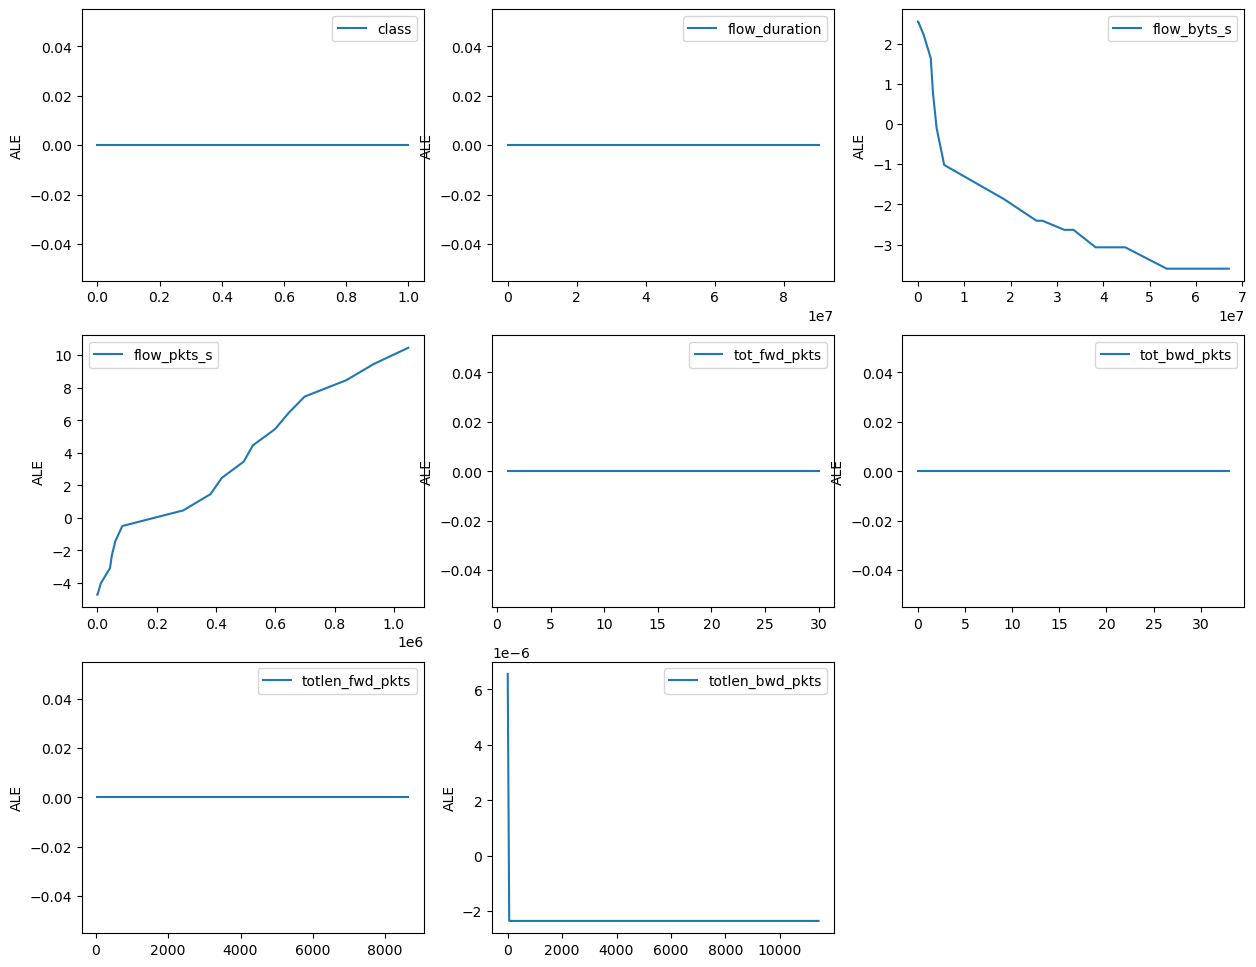

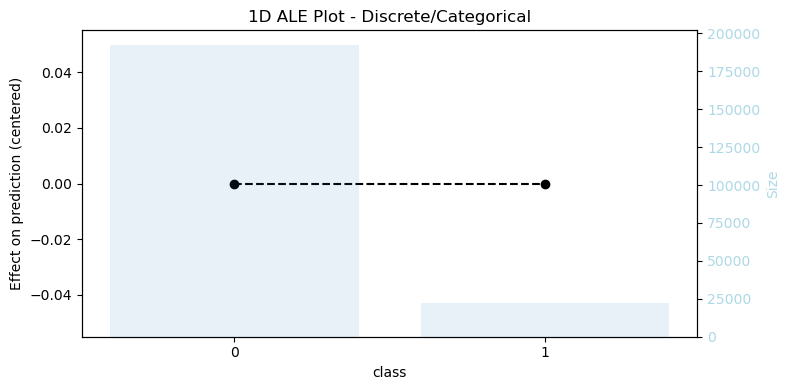

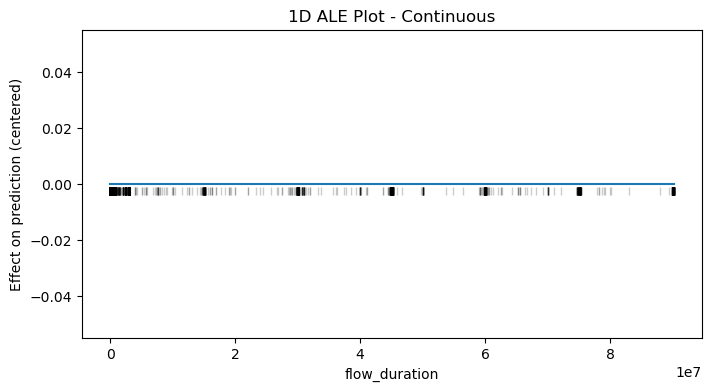

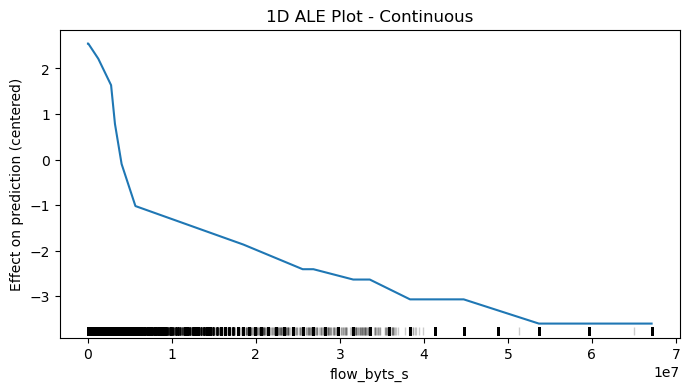

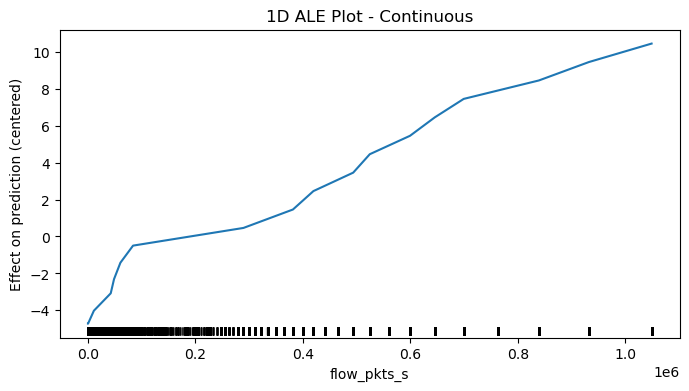

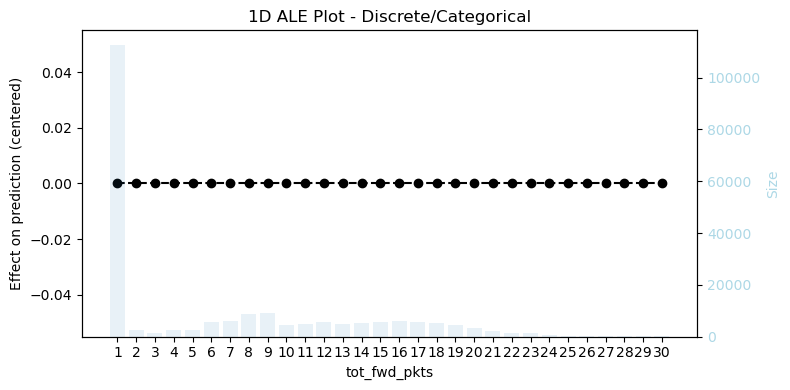

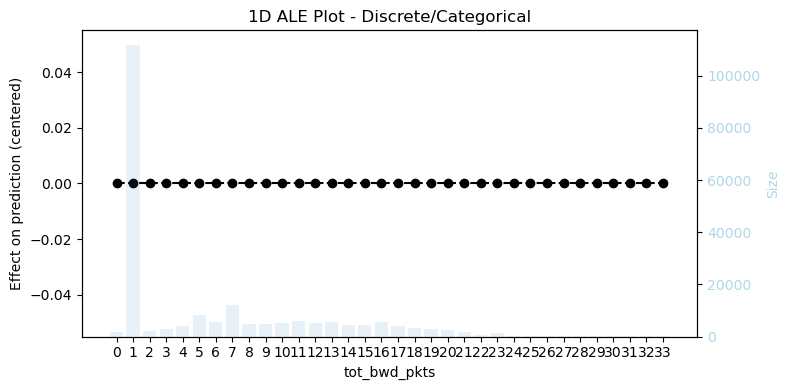

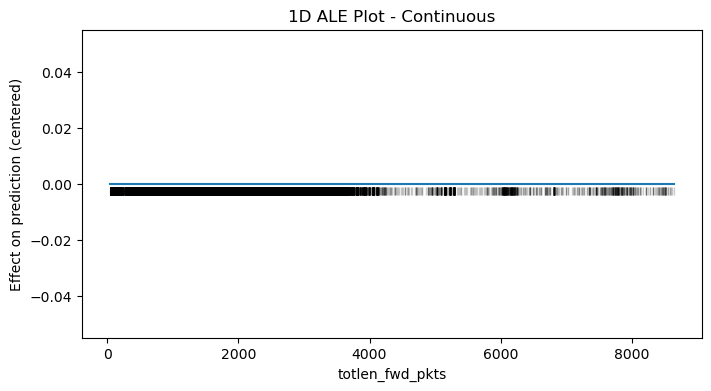

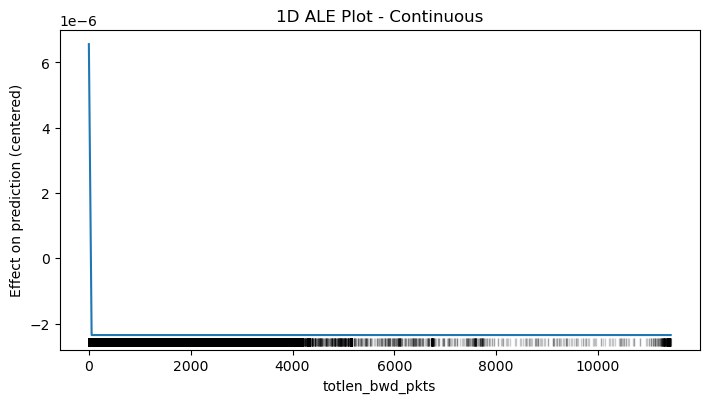

In [63]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from PyALE import ale
import math

model = LogisticRegression(random_state=42)
Y = np.nan_to_num(Y, nan=0)
model = model.fit(X, Y)
feature_list = X.columns
print(feature_list)

# Define the number of rows and columns for your subplot grid
num_cols = 3
num_rows = math.ceil(len(feature_list) / num_cols)

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

# Loop over each feature and plot its impact
for i, feature in enumerate(feature_list):
    row = i // num_cols
    col = i % num_cols

    percentile_95 = np.percentile(X[feature], 99)
    filtered_X = X[X[feature] <= percentile_95].copy()
    ale_eff = ale(X=filtered_X, model=model, feature=[feature], grid_size=50, include_CI=False)

    # Plot the ALE plot for the current feature
    axes[row, col].plot(ale_eff['eff'], label=feature)
    axes[row, col].set_ylabel("ALE")
    axes[row, col].legend()

# Hide any empty subplots
for j in range(len(feature_list), num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()


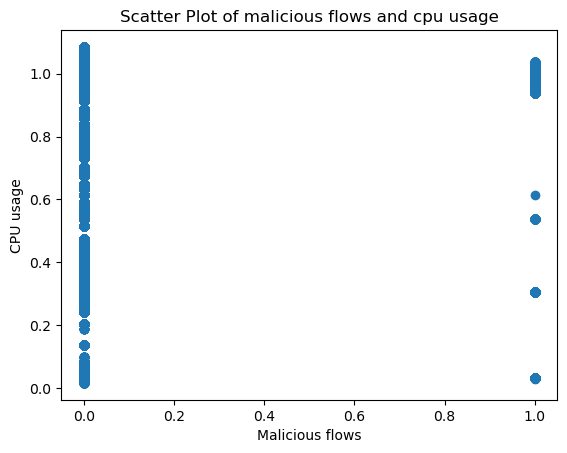

In [65]:
# # Scatter plot
# plt.scatter(df["class"], df["cpu_total"])
#
# # Adding labels and title
# plt.xlabel('Malicious flows')
# plt.ylabel('CPU usage')
# plt.title('Scatter Plot of malicious flows and cpu usage')
#
# # Display the plot
# plt.show()